In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial']
})



In [ ]:
file_path = 'person_identity_proportions.json'

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

data

{'schizophrenia': {'condition': 'schizophrenia',
  'singular_proportions': {'2010': 0.4,
   '2011': 0.0,
   '2012': 0.25,
   '2013': 0.0,
   '2014': 0.25,
   '2015': 0.14285714285714285,
   '2016': 0.18181818181818182,
   '2017': 0.2857142857142857,
   '2018': 0.5384615384615384,
   '2019': 0.2222222222222222,
   '2020': 0.3333333333333333,
   '2021': 0.23529411764705882,
   '2022': 0.15384615384615385,
   '2023': 0.36363636363636365,
   '2024': 0.15384615384615385,
   '2025': 0.0},
  'plural_proportions': {'2010': 0.023809523809523808,
   '2011': 0.05660377358490566,
   '2012': 0.011904761904761904,
   '2013': 0.009708737864077669,
   '2014': 0.010752688172043012,
   '2015': 0.0,
   '2016': 0.015151515151515152,
   '2017': 0.03773584905660377,
   '2018': 0.09090909090909091,
   '2019': 0.007246376811594203,
   '2020': 0.017241379310344827,
   '2021': 0.02127659574468085,
   '2022': 0.0446927374301676,
   '2023': 0.0136986301369863,
   '2024': 0.008403361344537815,
   '2025': 0.0178571

In [5]:
def prepare_from_proportions(proportions_data):
    rows = []
    
    for condition, cond_data in proportions_data.items():
        for year, proportion in cond_data['singular_proportions'].items():
            rows.append({
                'year': int(year),
                'condition': condition,
                'number': 'singular',
                'if_proportion': proportion
            })
        
        for year, proportion in cond_data['plural_proportions'].items():
            rows.append({
                'year': int(year),
                'condition': condition,
                'number': 'plural',
                'if_proportion': proportion
            })
    
    data = pd.DataFrame(rows)
    
    return data
now_df = prepare_from_proportions(data)
now_df

,year,condition,number,if_proportion
0,2010,schizophrenia,singular,0.400000
1,2011,schizophrenia,singular,0.000000
2,2012,schizophrenia,singular,0.250000
3,2013,schizophrenia,singular,0.000000
4,2014,schizophrenia,singular,0.250000
...,...,...,...,...
473,2021,dyslexia,plural,0.333333
474,2022,dyslexia,plural,0.222222
475,2023,dyslexia,plural,0.250000
476,2024,dyslexia,plural,0.233333


In [6]:
now_avg_df = (
    now_df
    .groupby(["year", "number"], as_index=False)["if_proportion"]
    .mean()
    .rename(columns={"if_proportion": "IF_proportion"})
)
now_avg_df

,year,number,IF_proportion
0,2010,plural,0.363080
1,2010,singular,0.452801
2,2011,plural,0.309100
3,2011,singular,0.544357
4,2012,plural,0.298561
5,2012,singular,0.580944
6,2013,plural,0.275557
7,2013,singular,0.645731
8,2014,plural,0.348977
9,2014,singular,0.427428


In [ ]:
gb_avg_df = pd.read_csv('identity_first_proportion_overall_unweighted.csv')
gb_avg_df = gb_avg_df.rename(columns={"Year": "year"})


In [8]:
now_avg_df["corpus"] = "NOW"
gb_avg_df["corpus"] = "Google Books"

plot_df = pd.concat([now_avg_df, gb_avg_df], ignore_index=True)

# standardise labels
plot_df["legend_label"] = (
    plot_df["corpus"] + " (" + plot_df["number"].str.capitalize() + ")"
)


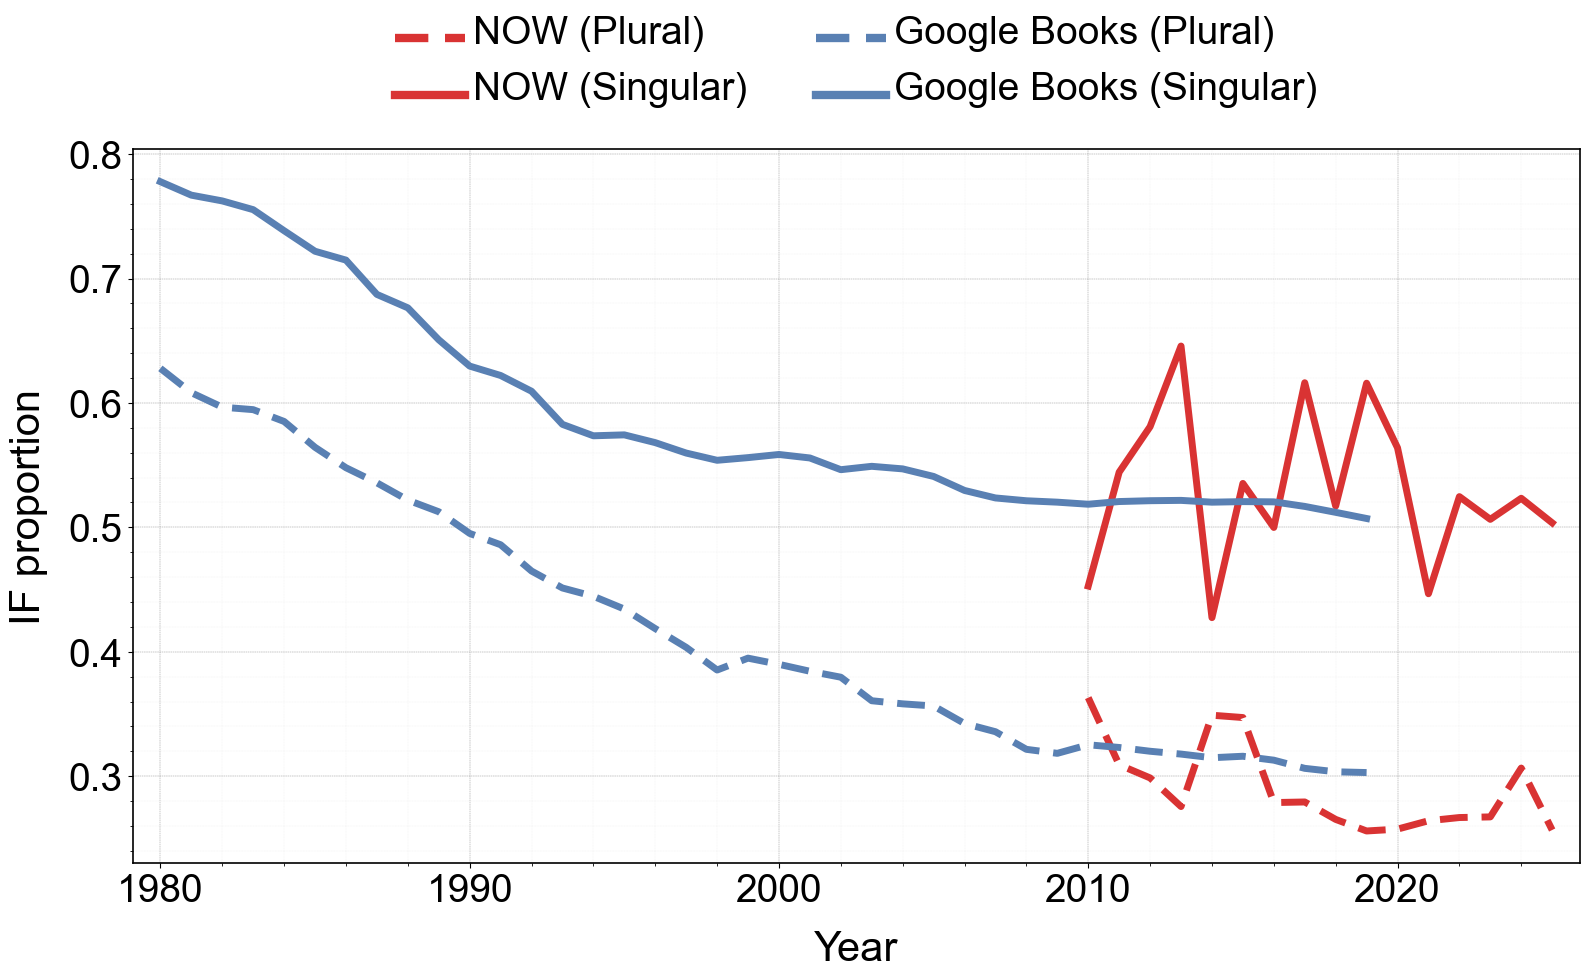

In [9]:
custom_palette = {
    "NOW (Singular)": (0.85, 0.20, 0.20),
    "NOW (Plural)":   (0.85, 0.20, 0.20),
    "Google Books (Singular)": (0.35, 0.50, 0.70),
    "Google Books (Plural)":   (0.35, 0.50, 0.70),
}

dashes = {
    "NOW (Singular)": "",
    "NOW (Plural)": (4, 2),
    "Google Books (Singular)": "",
    "Google Books (Plural)": (4, 2),
}

plt.figure(figsize=(16, 10))

ax = sns.lineplot(
    data=plot_df,
    x="year",
    y="IF_proportion",
    hue="legend_label",
    style="legend_label",
    palette=custom_palette,
    dashes=dashes,
    linewidth=5,
    alpha=1
)
plt.xlabel("Year", fontsize=30, labelpad=15, color="black")
plt.ylabel("IF proportion", fontsize=30, labelpad=15, color="black")

ax.tick_params(axis="both", labelsize=28, colors="black")
legend = ax.legend(
    bbox_to_anchor=(0.5, 1.2),
    loc="upper center",
    ncol=2,
    handlelength=5,
    handletextpad=0.6,
    labelspacing=1.5,
    columnspacing=5,
    borderaxespad=0.2
)
legend.set_frame_on(False)

for text in legend.get_texts():
    text.set_fontsize(28)
    text.set_color("black")

for line in legend.get_lines():
    line.set_linewidth(6)

for spine in ax.spines.values():
    spine.set_color("black")
    spine.set_linewidth(1.2)

ax.grid(color="gray", linestyle="--", linewidth=0.3)
ax.minorticks_on()
ax.grid(which="minor", color="lightgray", linestyle=":", linewidth=0.2)
ax.margins(x=0.02)

plt.tight_layout()
plt.show()


### individual condition plots

In [ ]:
gb_df = pd.read_csv('identity_first_proportion_by_target.csv')
gb_df = gb_df.rename(
    columns={
        "Year": "year",
        "target": "condition",
        "IF_proportion": "if_proportion"
    }
).drop(columns=['IF', 'PF'])

In [11]:
# standardise condition labels 
gb_to_data_map = {
    'alcoholic': 'alcoholism',
    'anorexic': 'anorexia',
    'anxious': 'anxiety',
    'autistic': 'autism',
    'bipolar': 'bipolar',
    'bulimic': 'bulimia',
    'depressed': 'depression',
    'diabetic': 'diabetes',
    'disabled': 'disability',
    'dyslexic': 'dyslexia',
    'epileptic': 'epilepsy',
    'mentally ill': 'mental_illness',
    'obese': 'obesity',
    'psychotic': 'psychosis',
    'schizophrenic': 'schizophrenia'
}
gb_df['condition'] = gb_df['condition'].replace(gb_to_data_map)


In [12]:
def plot_condition_corpora(data_now, data_gb, condition, color_now, color_gb, title=None):
    df_now = data_now[data_now['condition'] == condition].copy()
    df_now['corpus'] = 'NOW'
    
    df_gb = data_gb[data_gb['condition'] == condition].copy()
    df_gb['corpus'] = 'Google Books'
    
    df = pd.concat([df_now, df_gb], ignore_index=True)
    df = df.sort_values("year")
    
    dashes = {"singular": "", "plural": (4, 2)}
    colors = {"NOW": color_now, "Google Books": color_gb}
    
    plt.figure(figsize=(14, 8))
    
    for corpus in ['NOW', 'Google Books']:
        for number in ['singular', 'plural']:
            subset = df[(df['corpus'] == corpus) & (df['number'] == number)]
            plt.plot(
                subset['year'],
                subset['if_proportion'],
                label=f"{corpus} ({number.capitalize()})",
                color=colors[corpus],
                dashes=dashes[number],
                linewidth=5
            )
    
    plt.xlabel("Year", fontsize=25, labelpad=20)       
    plt.ylabel("IF proportion", fontsize=25, labelpad=20)  
    if title:
        plt.title(title, fontsize=30, pad=20)         

    plt.legend(title=None, fontsize=23, loc="lower left")

    plt.grid(True, linestyle='--', alpha=0.3)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.tight_layout()
    plt.show()


['alcoholism', 'anorexia', 'anxiety', 'autism', 'bipolar', 'bulimia', 'depression', 'diabetes', 'disability', 'dyslexia', 'epilepsy', 'mental_illness', 'obesity', 'psychosis', 'schizophrenia']

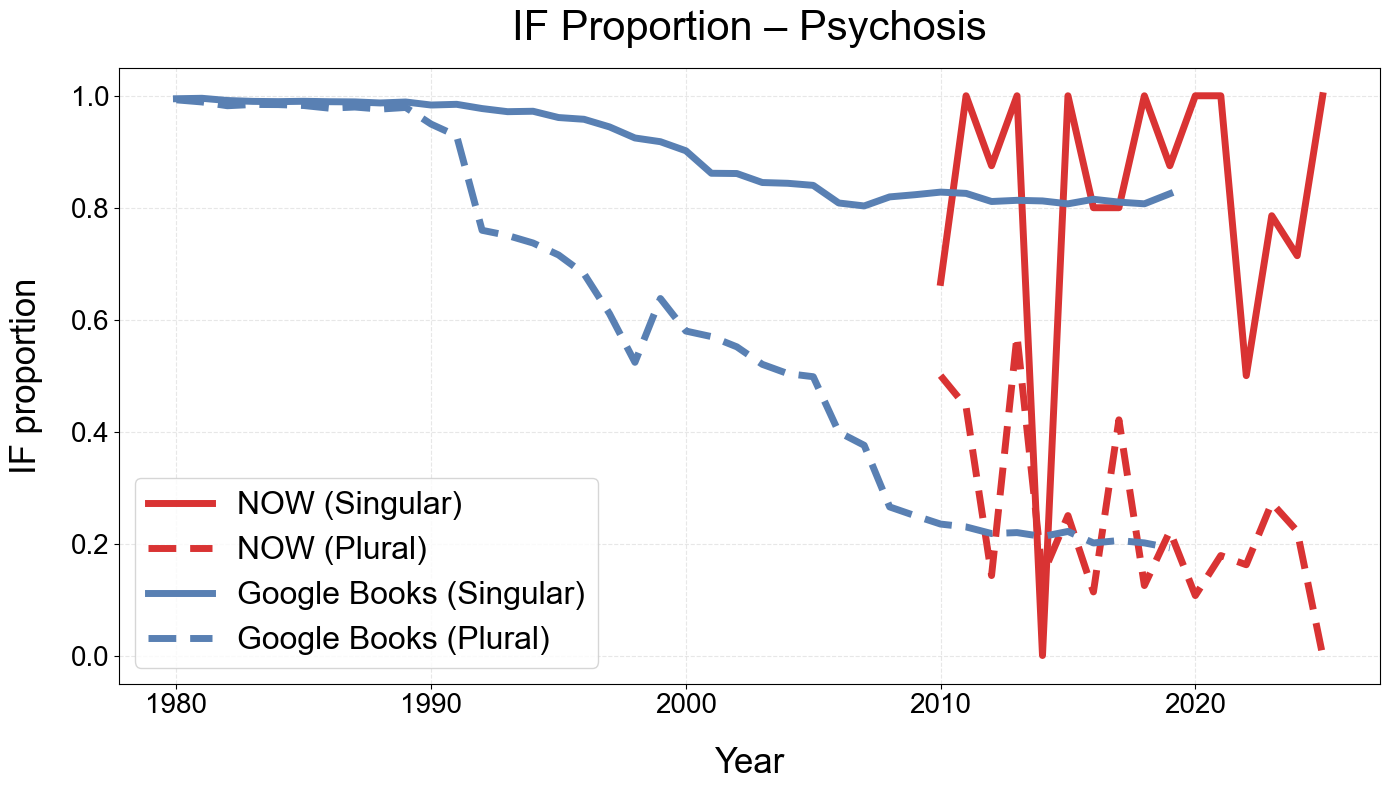

In [26]:
plot_condition_corpora(
    data_now=now_df,
    data_gb=gb_df,
    condition="psychosis",
    color_now=(0.85, 0.20, 0.20),   
    color_gb=(0.35, 0.50, 0.70),   
    title="IF Proportion – Psychosis"
)


In [ ]:
# can use different colours
plot_condition_corpora(
    data_now=now_df,
    data_gb=gb_df,
    condition="autism",
    color_now=(0.55,0.70,0.50),   
    color_gb=(0.55,0.60,0.75),   
    title="IF Proportion – autism"
)
